## Modélisation 

In [ ]:
!pip install import-ipynb
!pip install seaborn

In [ ]:
# Données 
import import_ipynb
import declarations_AV as dec
import Recuperation_des_donnees_AV as donnees
import Carte_ensoleillement_AV as sol

In [11]:
# Modélisation
import seaborn as sns
import pandas as pd

Le but de cette partie est de prédire la consommation d'électricité par habitants à partir des données météo que nous avons récoltées.

### 1- Création d'un dataset alliant les données de consommation, températures et ensoleillement récupérées

Avant de commencer la modélisation, il est nécessaire de rassembler toutes les données collectées que nous utiliserons dans la modélisation dans un même DataFrame. Nous nous intéressons en particulier à l'année 2020.

In [19]:
df_2020=donnees.dico_df_cons_tot[2020].merge(donnees.dico_df_temp[2020], how='left', left_on='Code Département', right_on='code_insee_departement')
df_2020=df_2020.merge(sol.ensoleillement, how='left', left_on='Libellé Département', right_on='Départements')
df_2020=df_2020.drop(['code_insee_departement', 'departement','Départements'], axis='columns')
#df_2020['Delta tempérarure']=df_2020['tmax']-df_2020['tmin']
df_2020.head(3)

,Code Département,Libellé Département,Consommation Résidentiel (MWh),Population,Consommation Résidentiel par habitant (MWh),tmoy,tmax,tmin,Temps d'ensoleillement (jours/an)
0,01,Ain,1.805527e+06,657856,2.745,12.769262,38.9,-5.3,182.0
1,02,Aisne,1.281305e+06,529374,2.420,12.189617,37.9,-4.7,142.0
2,03,Allier,8.808159e+05,335628,2.624,13.042760,40.2,-6.3,161.0


In [20]:
print("NaN occurrences in Columns:")
print(df_2020.isnull().sum(axis=0))

NaN occurrences in Columns:
Code Département                               0
Libellé Département                            0
Consommation Résidentiel  (MWh)                0
Population                                     0
Consommation Résidentiel par habitant (MWh)    0
tmoy                                           0
tmax                                           0
tmin                                           0
Temps d'ensoleillement (jours/an)              4
dtype: int64


In [21]:
# On supprime les départements pour lesquels on a des valeurs d'ensoleillement manquantes
df_2020=df_2020.dropna(how='any')
df_2020.shape

(92, 9)

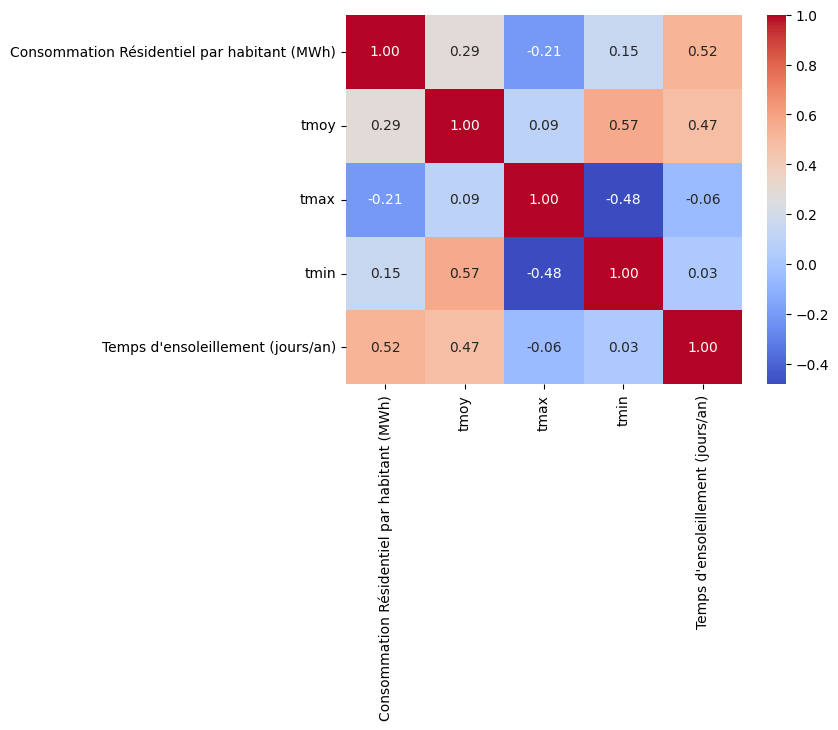

In [22]:
# Matrice de corrélation graphique
g1 = sns.heatmap(df_2020.drop(['Code Département','Libellé Département','Consommation Résidentiel  (MWh)',
                               'Population'], axis = 1).corr(), cmap='coolwarm', annot=True, fmt=".2f")

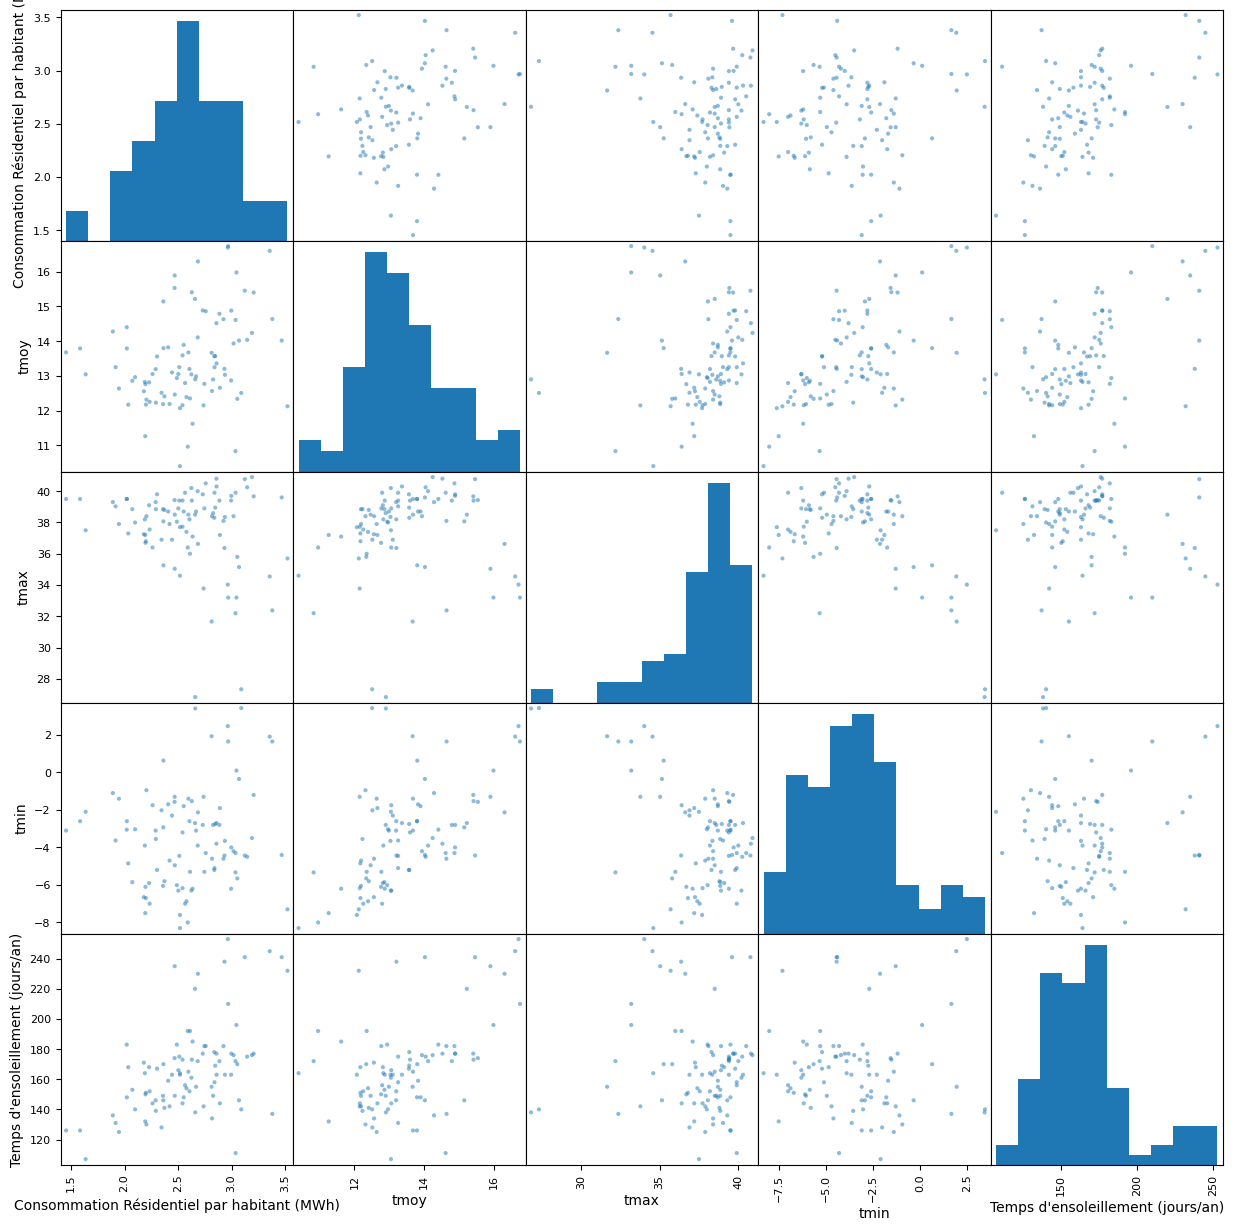

In [12]:
ax = pd.plotting.scatter_matrix(df_2020.drop(['Code Département','Libellé Département','Consommation Résidentiel  (MWh)',
                               'Population'], axis = 1), figsize = (15,15))

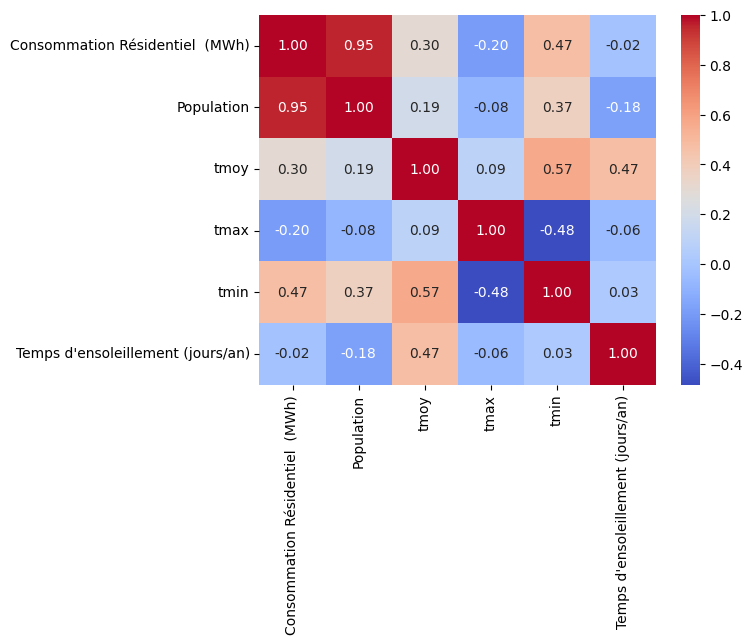

In [10]:
g2 = sns.heatmap(df_2020.drop(['Code Département','Libellé Département','Consommation Résidentiel par habitant (MWh)'], axis = 1).corr(), cmap='coolwarm', annot=True, fmt=".2f")

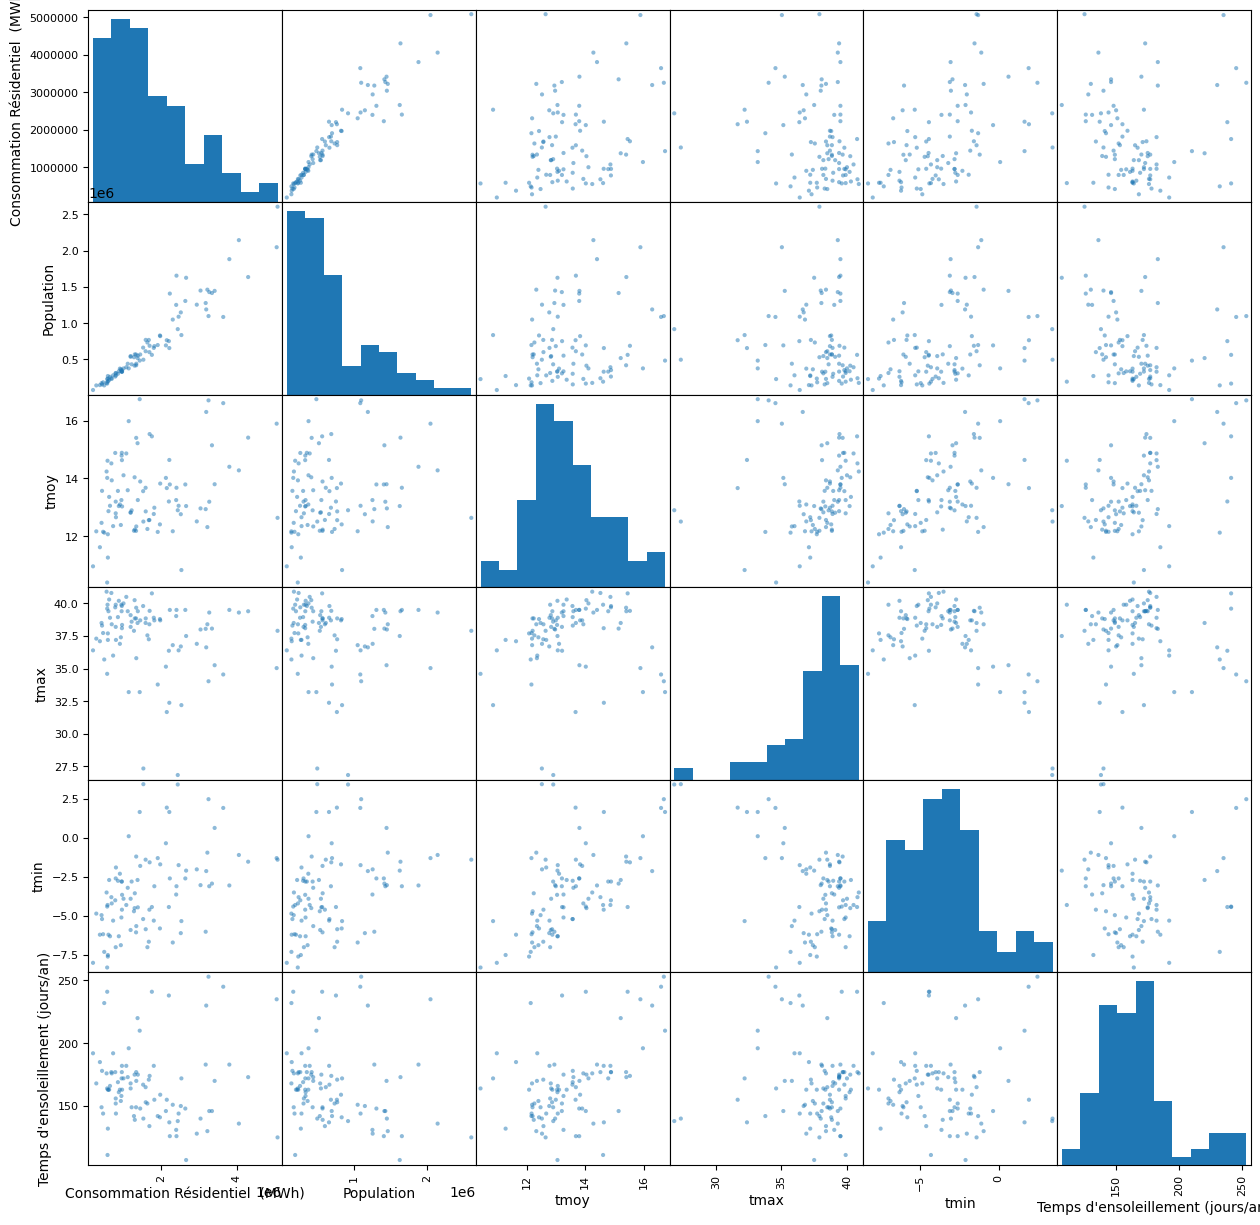

In [13]:
ax = pd.plotting.scatter_matrix(df_2020.drop(['Code Département','Libellé Département','Consommation Résidentiel par habitant (MWh)'], axis = 1), figsize = (15,15))

In [27]:
def f(annee):
    df=donnees.dico_df_cons_tot[annee].merge(donnees.dico_df_temp[annee], how='left', left_on='Code Département', right_on='code_insee_departement')
    df=df.merge(sol.ensoleillement, how='left', left_on='Libellé Département', right_on='Départements')
    df=df.drop(['code_insee_departement', 'departement','Départements'], axis='columns')
    df=df.dropna(how='any')
    return df
df_test=pd.concat([f(year) for year in range(2018,2021)])

,Code Département,Libellé Département,Consommation Résidentiel (MWh),Population,Consommation Résidentiel par habitant (MWh),tmoy,tmax,tmin,Temps d'ensoleillement (jours/an)
0,01,Ain,1.743025e+06,647634,2.691,13.337260,36.9,-12.1,182.0
1,02,Aisne,1.300874e+06,533316,2.439,11.747260,36.2,-9.5,142.0
2,03,Allier,8.839105e+05,337171,2.622,13.007123,38.0,-12.8,161.0
3,04,Alpes-de-Haute-Provence,5.599612e+05,164068,3.413,14.285890,35.9,-6.1,241.0
4,05,Hautes-Alpes,4.940654e+05,140698,3.512,12.198356,33.7,-10.0,232.0


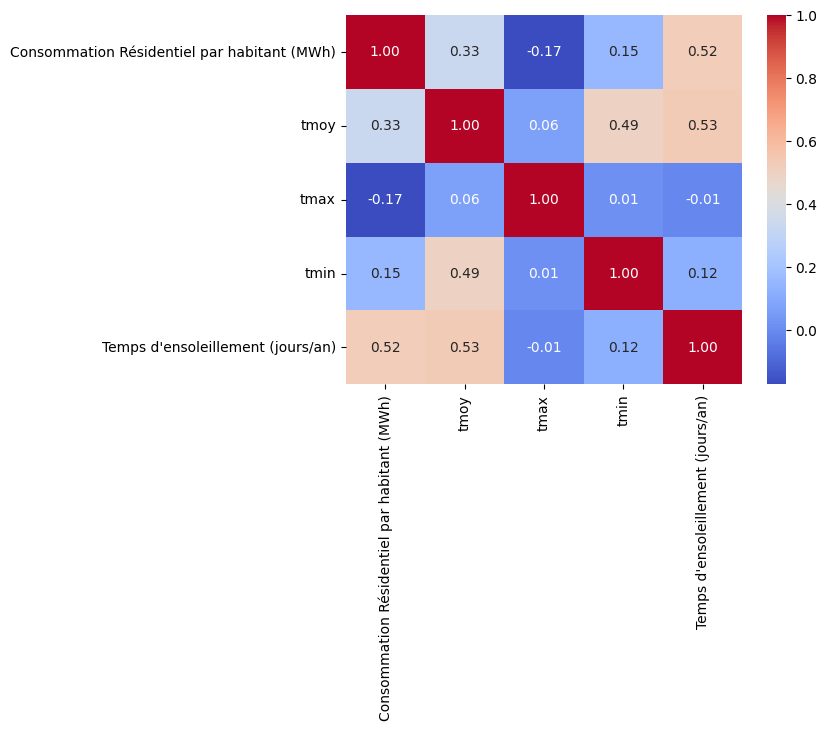

In [28]:
g3 = sns.heatmap(df_test.drop(['Code Département','Libellé Département','Consommation Résidentiel  (MWh)',
                               'Population'], axis = 1).corr(), cmap='coolwarm', annot=True, fmt=".2f")